***
$$\mathbf{\text{Author: Kenneth Kusima}}$$<br>
$$\mathbf{\text{Python Kinetics Code}}$$<br>
$\mathbf{\text{Date:11/23}}$<br>
***

# KINETICS
***
$\mathbf{\text{Micro Kinetic Model for (a Simple 4-Step Mechanism) CO Oxidation}}:$<br>
#### [Link to Relevant Paper](https://pubs.acs.org/doi/10.1021/cs500377j) 

Rxn 1:&emsp;   
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $ CO(g) + * \rightleftharpoons CO^{*} $  <br> 

Rxn 2:&emsp;   
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$ {O_2}(g) + * \rightleftharpoons {O_2}^{*} $  <br> 

Rxn 3:&emsp;   
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$ {O_2}^* + * \rightleftharpoons 2{O}^* $  <br> 

Rxn 4:&emsp;   
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$ {CO}^{*} + {O}^{*} \rightleftharpoons {{CO}_2}^* + * $  <br> 

Rxn 5:&emsp;  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$ {CO}^{*} + {O_2}^{*} \rightleftharpoons {{CO}_2}^* + O^* $  <br> 

Rxn 6:&emsp;  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$ {CO_2}^{*} \rightleftharpoons {{CO}_2}(g) + * $  <br> 

---------------------------------
Rxn 7:&emsp;  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$ {NO}{(g)} + *\rightleftharpoons {{NO}^*} $  <br> 

Rxn 8:&emsp;  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$ {NO}^*  + {O}^* \rightleftharpoons {{{NO}_2}^*} + *$  <br> 

Rxn 9:&emsp;  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$ {NO}^*  + {O_2}^* \rightleftharpoons {{{NO}_2}^*} + O^*$  <br> 

Rxn 10:&emsp;  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$ {{{NO}_2}^*} + *\rightleftharpoons {NO}{(g)} + * $  <br> 

---------------------------------

***
$\mathbf{\text{Modelling Proposed Reaction Mechanism}}:$<br>
***
${{k_i}^j= \textrm{Rate constant/coefficient for reaction i,}} \\  \hspace{0.5cm} \textrm{for j = {f,r} ; where f = forward reaction and r  = the reverse reaction} \\ r_i = \textrm{Rate of reaction for reaction i}$

${\theta_m = \textrm{Surface Coverage of species m}} \\ \sum_{m=1}^{N} \theta_{m} = 1 \\ \hspace{1.3cm} =
\theta_{CO} + \theta_{O_2} + \theta_{O} + \theta_{*}$


Rate Equations (CO Oxidation):&emsp;

$$r_1 = k_{1}^f \cdot \textrm{P}_{CO} \cdot \theta_{*} - k_{1}^r \cdot \theta_{CO} $$

$$r_2 = k_{2}^f \cdot \textrm{P}_{O_2} \cdot \theta_{*} - k_{2}^r \cdot \theta_{O_{2}} $$

$$r_3 = k_{3}^f \cdot \theta_{O_2} \cdot \theta_{*} - k_{3}^r \cdot \theta_{O}^2 $$

$$r_4 = k_{4}^f \cdot \theta_{CO} \cdot \theta_{O} - k_{4}^r \cdot \theta_{{CO}_2} \cdot \theta_{*} $$

$$r_5 = k_{5}^f \cdot \theta_{CO} \cdot \theta_{O_2} - k_{5}^r \cdot \theta_{{CO}_2} \cdot \theta_{O} $$

$$r_6 = k_{6}^f \cdot \theta_{{CO}_2}  - k_{6}^r \cdot \textrm{P}_{{CO}_2} \cdot \theta_{*} $$



Rate Equations (NO Oxidation):&emsp;

$$r_7 = k_{7}^f \cdot \textrm{P}_{NO} \cdot \theta_{*} - k_{7}^r \cdot \theta_{NO} $$

$$r_8 = k_{8}^f \cdot \theta_{NO} \cdot \theta_{O} - k_{8}^r \cdot \theta_{{NO}_2}\cdot  \theta_{*} $$

$$r_9 = k_{9}^f \cdot \theta_{NO} \cdot \theta_{O_2} - k_{9}^r \cdot \theta_{{NO}_2} \cdot \theta_{O} $$

$$r_{10} = k_{10}^f \cdot \theta_{{NO}_2} - k_{10}^r \cdot \textrm{P}_{{NO}_2} \cdot \theta_{*} $$





In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# -----------------------------------------------------------------------------------------

## Case Analysis

In [3]:
# Loading the Excel workbook
df = pd.read_excel('DOC_model.xlsm', sheet_name='Cases')
df.columns = df.iloc[0]
df = df.iloc[1:]

############ Cleaning up the Dataframe:
df = df[df.isin(['error', 'error']) == False]
df = df.dropna()

############ Specifying composition:
#Extracting GHSV 10% of 30,000 i.e 29,700- 30,300 1/h
th_df = df.loc[(df['GHSV'] >= 29700.0) & (df['GHSV'] <= 30300.0)]

#Extracting H2O conc ~0%
th_df = df.loc[(df['Water'] == 0.0)]


############ Removing zero/nan terms
#Extracting only those non-zero X_CO and X_NO
th_df = th_df.loc[th_df['R1: X_CO'] != 0]
th_df = th_df.loc[th_df['R2:X_NO'] != 0]

#Extracting only those X_CO and X_NO that are greater than 0 and less than 1
th_df = th_df.loc[th_df['R1: X_CO'] > 0]
th_df = th_df.loc[th_df['R2:X_NO'] > 0]
th_df = th_df.loc[th_df['R1: X_CO'] < 1]
th_df = th_df.loc[th_df['R2:X_NO'] < 1]

#Extracting Specific Catalysts
th_df_PtPd = th_df.loc[th_df['Catalyst'] == 'PtPd']
th_df_PtCu = th_df.loc[th_df['Catalyst'] == 'PtCu']
th_df_PdCu = th_df.loc[th_df['Catalyst'] == 'PdCu']


In [4]:
print(np.shape(th_df))
print(np.shape(th_df_PtPd))
print(np.shape(th_df_PtCu))
print(np.shape(th_df_PdCu))

(56, 14)
(20, 14)
(18, 14)
(18, 14)


In [5]:
th_df_PtCu

,Index,Catalyst,Run,ToL,GHSV,Cat Temp,Oxygen,Water,Carbon monoxide,Nitric oxide,Carbon Dioxide,Nitrogen Dioxide,R1: X_CO,R2:X_NO
45,45,PtCu,20230522,112,30036.04102,193.033522,0.100548,0,1019.704682,197.846307,0,0,0.999758,0.694902
46,46,PtCu,20230522,119,29444.477964,193.484166,0.102568,0,1040.191362,101.367208,0,0,0.999391,0.897547
49,49,PtCu,20230522,145,29291.144413,190.297197,0.103105,0,522.155649,101.897846,0,0,0.999346,0.797964
50,50,PtCu,20230522,151,29888.085315,189.622759,0.101045,0,511.726875,199.725374,0,0,0.999499,0.550299
53,53,PtCu,20230522,232,30041.418866,181.393005,0.10053,0,1019.52214,198.705961,0,0,0.998786,0.330557
57,57,PtCu,20230522,262,29282.272891,178.404663,0.103136,0,510.382817,101.01044,0,0,0.999146,0.661953
58,58,PtCu,20230522,269,29884.591639,177.780622,0.101057,0,500.09614,199.748723,0,0,0.998939,0.360586
61,61,PtCu,20230522,329,30032.215919,164.983865,0.10056,0,1025.004822,196.97616,0,0,0.922445,0.059985
62,62,PtCu,20230522,339,29446.030709,166.424674,0.102562,0,1045.4097,101.361862,0,0,0.985865,0.342851
65,65,PtCu,20230522,361,29295.357701,162.715942,0.10309,0,518.105319,102.801057,0,0,0.999267,0.497513


In [6]:
## Making sure the vectors are sorted in the order of ascending temperature to help with plotting
def sort_vectors(x, y):
    # Combining x and y into a list of tuples
    combined = list(zip(x, y))

    # Sorting the list of tuples based on the values in x
    sorted_combined = sorted(combined, key=lambda pair: pair[0])

    # Unpack the sorted tuples back into separate x and y vectors
    sorted_x, sorted_y = zip(*sorted_combined)

    return list(sorted_x), list(sorted_y) #return sorted tuples as lists

OG_Temp_PtPd,OG_PtPd_X_CO_vals = sort_vectors(list(th_df_PtPd['Cat Temp']), list(th_df_PtPd['R1: X_CO']))
OG_Temp_PtCu,OG_PtCu_X_CO_vals = sort_vectors(list(th_df_PtCu['Cat Temp']), list(th_df_PtCu['R1: X_CO']))
OG_Temp_PdCu,OG_PdCu_X_CO_vals = sort_vectors(list(th_df_PdCu['Cat Temp']), list(th_df_PdCu['R1: X_CO']))


OG_Temp_PtPd,OG_PtPd_X_NO_vals = sort_vectors(list(th_df_PtPd['Cat Temp']), list(th_df_PtPd['R2:X_NO']))
OG_Temp_PtCu,OG_PtCu_X_NO_vals = sort_vectors(list(th_df_PtCu['Cat Temp']), list(th_df_PtCu['R2:X_NO']))
OG_Temp_PdCu,OG_PdCu_X_NO_vals = sort_vectors(list(th_df_PdCu['Cat Temp']), list(th_df_PdCu['R2:X_NO']))

In [7]:
def rearrange_vectors(a, b, c): #Function to remove values (lower than constant
                                    #c) from a and prepare b vector accordingly ready for fitting
    # Create a list of indices that would sort vector a
    sorted_indices = sorted(range(len(a)), key=lambda k: a[k])

    # Rearrange vector a based on the sorted order
    a = [a[i] for i in sorted_indices]
    # Rearrange vector b based on the sorted order
    b = [b[i] for i in sorted_indices]

    # Find the index of the first element in a that is greater than or equal to c
    index_to_remove = next((i for i, value in enumerate(a) if value >= c), len(a))

    # Remove the first n values in vector a that are less than c
    a = a[index_to_remove:]
    # Remove corresponding values in vector b
    b = b[index_to_remove:]

    return a, b

<IPython.core.display.Javascript object>


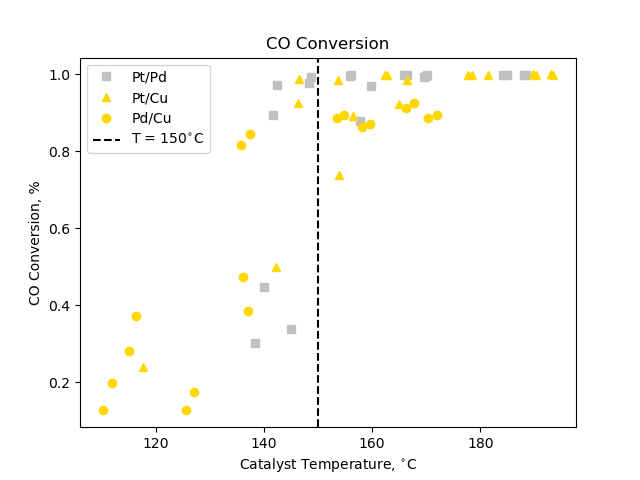

In [8]:
plt.figure() #CO Conv
plt.plot(OG_Temp_PtPd, OG_PtPd_X_CO_vals,'s', color="silver",label='Pt/Pd') 
plt.plot(OG_Temp_PtCu, OG_PtCu_X_CO_vals,'^', color="#FFD700", label='Pt/Cu')
plt.plot(OG_Temp_PdCu, OG_PdCu_X_CO_vals,'o', color="#FFD700", label='Pd/Cu')

# Draw a vertical line at x=150
plt.axvline(x=150,color = 'k',linestyle='--',label=r'T = 150$^{\circ}$C')

plt.title('CO Conversion')
plt.xlabel(r'Catalyst Temperature, $^{\circ}$C')
plt.ylabel("CO Conversion, %")
plt.legend(loc='best')
plt.show()

<IPython.core.display.Javascript object>


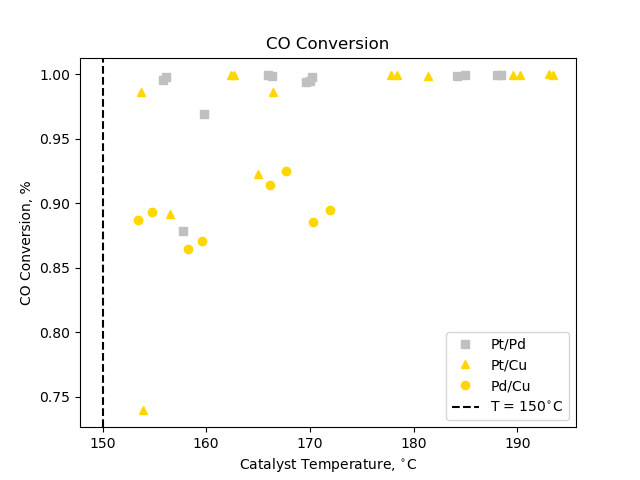

In [9]:
plt.figure() #CO Conv

OG_Temp_PtPd_150, OG_PtPd_X_CO_vals_150 = rearrange_vectors(OG_Temp_PtPd,OG_PtPd_X_CO_vals,150)
OG_Temp_PtCu_150, OG_PtCu_X_CO_vals_150 = rearrange_vectors(OG_Temp_PtCu,OG_PtCu_X_CO_vals,150)
OG_Temp_PdCu_150, OG_PdCu_X_CO_vals_150 = rearrange_vectors(OG_Temp_PdCu,OG_PdCu_X_CO_vals,150)

plt.plot(OG_Temp_PtPd_150, OG_PtPd_X_CO_vals_150,'s', color="silver",label='Pt/Pd') 
plt.plot(OG_Temp_PtCu_150, OG_PtCu_X_CO_vals_150,'^', color="#FFD700", label='Pt/Cu')
plt.plot(OG_Temp_PdCu_150, OG_PdCu_X_CO_vals_150,'o', color="#FFD700", label='Pd/Cu')

# Draw a vertical line at x=150
plt.axvline(x=150,color = 'k',linestyle='--',label=r'T = 150$^{\circ}$C')

plt.title('CO Conversion')
plt.xlabel(r'Catalyst Temperature, $^{\circ}$C')
plt.ylabel("CO Conversion, %")
plt.legend(loc='best')
plt.show()

<IPython.core.display.Javascript object>


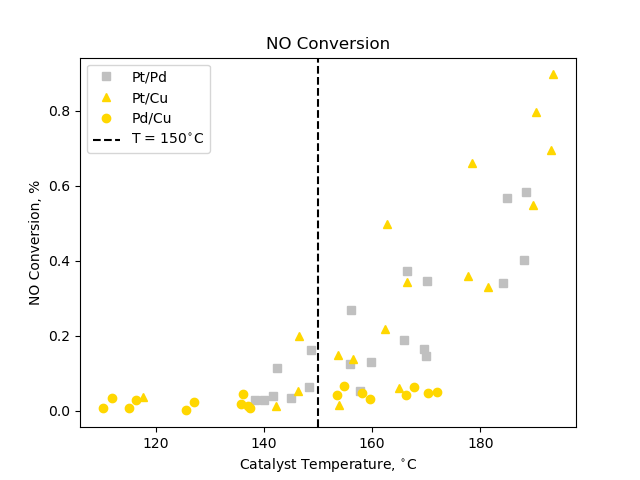

In [10]:
plt.figure() #NO Conv

plt.plot(OG_Temp_PtPd, OG_PtPd_X_NO_vals,'s', color="silver",label='Pt/Pd') 
plt.plot(OG_Temp_PtCu, OG_PtCu_X_NO_vals,'^', color="#FFD700", label='Pt/Cu')
plt.plot(OG_Temp_PdCu, OG_PdCu_X_NO_vals,'o', color="#FFD700", label='Pd/Cu')

# Draw a vertical line at x=150
plt.axvline(x=150,color = 'k',linestyle='--',label=r'T = 150$^{\circ}$C')

plt.title('NO Conversion')
plt.xlabel(r'Catalyst Temperature, $^{\circ}$C')
plt.ylabel("NO Conversion, %")
plt.legend(loc='best')
plt.show()

<IPython.core.display.Javascript object>


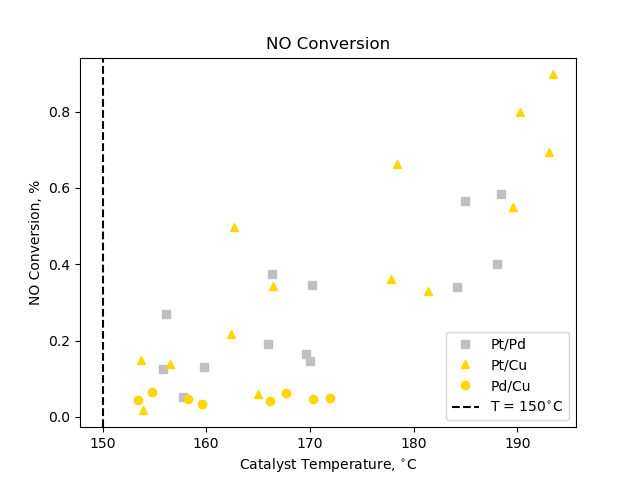

In [11]:
plt.figure() #NO Conv

OG_Temp_PtPd_150, OG_PtPd_X_NO_vals_150 = rearrange_vectors(OG_Temp_PtPd,OG_PtPd_X_NO_vals,150)
OG_Temp_PtCu_150, OG_PtCu_X_NO_vals_150 = rearrange_vectors(OG_Temp_PtCu,OG_PtCu_X_NO_vals,150)
OG_Temp_PdCu_150, OG_PdCu_X_NO_vals_150 = rearrange_vectors(OG_Temp_PdCu,OG_PdCu_X_NO_vals,150)

plt.plot(OG_Temp_PtPd_150, OG_PtPd_X_NO_vals_150,'s', color="silver",label='Pt/Pd') 
plt.plot(OG_Temp_PtCu_150, OG_PtCu_X_NO_vals_150,'^', color="#FFD700", label='Pt/Cu')
plt.plot(OG_Temp_PdCu_150, OG_PdCu_X_NO_vals_150,'o', color="#FFD700", label='Pd/Cu')

# Draw a vertical line at x=150
plt.axvline(x=150,color = 'k',linestyle='--',label=r'T = 150$^{\circ}$C')

plt.title('NO Conversion')
plt.xlabel(r'Catalyst Temperature, $^{\circ}$C')
plt.ylabel("NO Conversion, %")
plt.legend(loc='best')
plt.show()

### Un-guided Un-informed SVR fitting

In [12]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Full_Temp = {'PtPd':OG_Temp_PtPd, 'PtCu' : OG_Temp_PtCu, 'PdCu' : OG_Temp_PdCu }
Full_X_CO  = {'PtPd':OG_PtPd_X_CO_vals, 'PtCu' : OG_PtCu_X_CO_vals, 'PdCu' : OG_PdCu_X_CO_vals }
Full_X_NO  = {'PtPd':OG_PtPd_X_NO_vals, 'PtCu' : OG_PtCu_X_NO_vals, 'PdCu' : OG_PdCu_X_NO_vals }

UG_X_CO_pred_temp = {}
UG_X_NO_pred_temp = {}
UG_X_CO_pred = {} #unguided predictions
UG_X_NO_pred = {} #unguided predictions

In [13]:
%%time
## CO CONVERSION
for i in np.arange(3):
    np.random.seed(42)
    X = np.array(list(Full_Temp.values())[i]).reshape(-1, 1)
    y = np.array(list(Full_X_CO.values())[i]).reshape(-1, 1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    svr_model = SVR(kernel='rbf', C=10, gamma=0.00001, epsilon=0.1)

    svr_model.fit(X_train, y_train)

    y_pred = svr_model.predict(X_test)
    
    UG_X_CO_pred_temp[list(Full_X_CO.keys())[i]] = X_test
    UG_X_CO_pred[list(Full_X_CO.keys())[i]] = y_pred

    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.09411314786370956
Mean Squared Error: 0.12468727749050411
Mean Squared Error: 0.04339276680886861
CPU times: user 5.27 ms, sys: 2.09 ms, total: 7.36 ms
Wall time: 6.25 ms


/Users/klkusima/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/klkusima/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/klkusima/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<IPython.core.display.Javascript object>


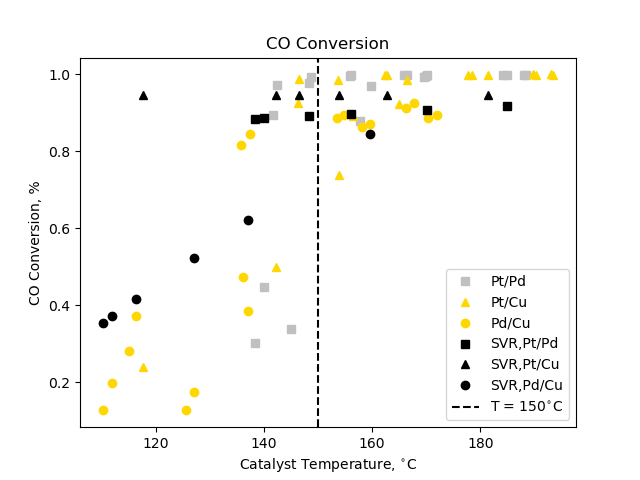

In [14]:
plt.figure() #CO Conv

plt.plot(OG_Temp_PtPd, OG_PtPd_X_CO_vals,'s', color="silver",label='Pt/Pd') 
plt.plot(OG_Temp_PtCu, OG_PtCu_X_CO_vals,'^', color="#FFD700", label='Pt/Cu')
plt.plot(OG_Temp_PdCu, OG_PdCu_X_CO_vals,'o', color="#FFD700", label='Pd/Cu')


plt.plot(UG_X_CO_pred_temp['PtPd'], UG_X_CO_pred['PtPd'],'s', color="k",label='SVR,Pt/Pd') 
plt.plot(UG_X_CO_pred_temp['PtCu'], UG_X_CO_pred['PtCu'],'^', color="k", label='SVR,Pt/Cu')
plt.plot(UG_X_CO_pred_temp['PdCu'], UG_X_CO_pred['PdCu'],'o', color="k", label='SVR,Pd/Cu')

# Draw a vertical line at x=150
plt.axvline(x=150,color = 'k',linestyle='--',label=r'T = 150$^{\circ}$C')

plt.title('CO Conversion')
plt.xlabel(r'Catalyst Temperature, $^{\circ}$C')
plt.ylabel("CO Conversion, %")
plt.legend(loc='best')
plt.show()

In [15]:
%%time
## NO CONVERSION
for i in np.arange(3):
    np.random.seed(42)
    X = np.array(list(Full_Temp.values())[i]).reshape(-1, 1)
    y = np.array(list(Full_X_NO.values())[i]).reshape(-1, 1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    svr_model = SVR(kernel='rbf', C=1, gamma=0.0001, epsilon=0.1)

    svr_model.fit(X_train, y_train)

    y_pred = svr_model.predict(X_test)
    
    UG_X_NO_pred_temp[list(Full_X_NO.keys())[i]] = X_test
    UG_X_NO_pred[list(Full_X_NO.keys())[i]] = y_pred

    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.015533378012105208
Mean Squared Error: 0.02253828453198614
Mean Squared Error: 0.0001976588369755119
CPU times: user 3.89 ms, sys: 1.57 ms, total: 5.46 ms
Wall time: 4.28 ms


/Users/klkusima/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/klkusima/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/klkusima/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<IPython.core.display.Javascript object>


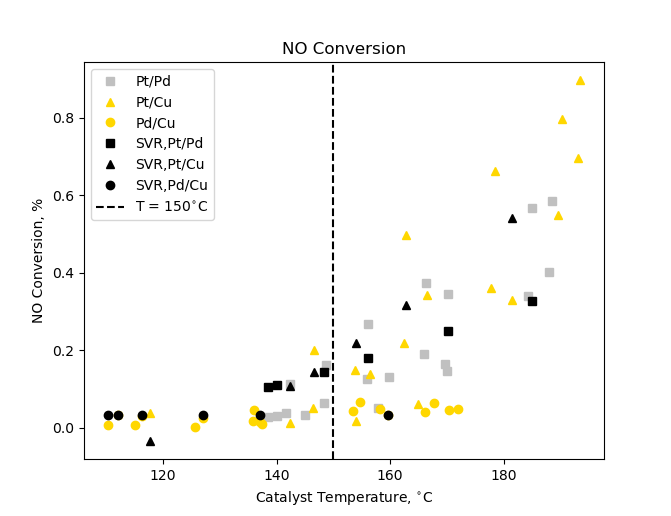

In [16]:
plt.figure() #NO Conv

plt.plot(OG_Temp_PtPd, OG_PtPd_X_NO_vals,'s', color="silver",label='Pt/Pd') 
plt.plot(OG_Temp_PtCu, OG_PtCu_X_NO_vals,'^', color="#FFD700", label='Pt/Cu')
plt.plot(OG_Temp_PdCu, OG_PdCu_X_NO_vals,'o', color="#FFD700", label='Pd/Cu')


plt.plot(UG_X_NO_pred_temp['PtPd'], UG_X_NO_pred['PtPd'],'s', color="k",label='SVR,Pt/Pd') 
plt.plot(UG_X_NO_pred_temp['PtCu'], UG_X_NO_pred['PtCu'],'^', color="k", label='SVR,Pt/Cu')
plt.plot(UG_X_NO_pred_temp['PdCu'], UG_X_NO_pred['PdCu'],'o', color="k", label='SVR,Pd/Cu')

# Draw a vertical line at x=150
plt.axvline(x=150,color = 'k',linestyle='--',label=r'T = 150$^{\circ}$C')

plt.title('NO Conversion')
plt.xlabel(r'Catalyst Temperature, $^{\circ}$C')
plt.ylabel("NO Conversion, %")
plt.legend(loc='best')
plt.show()